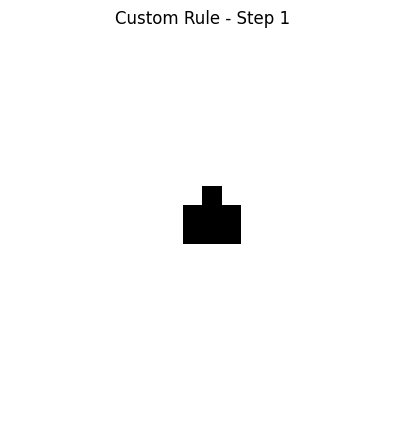

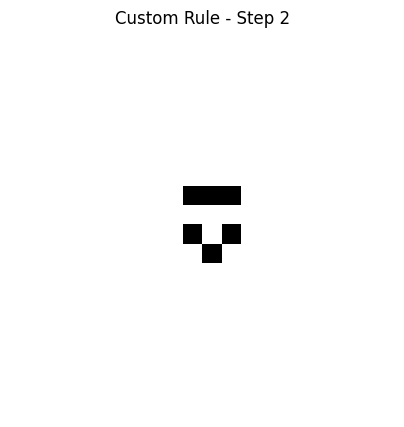

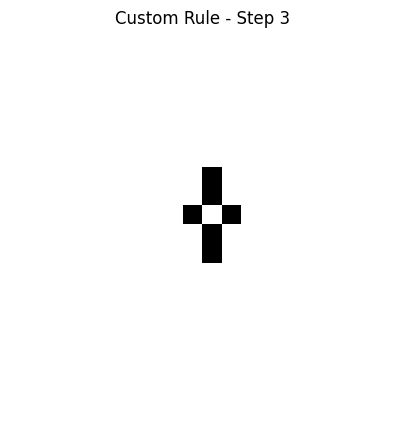

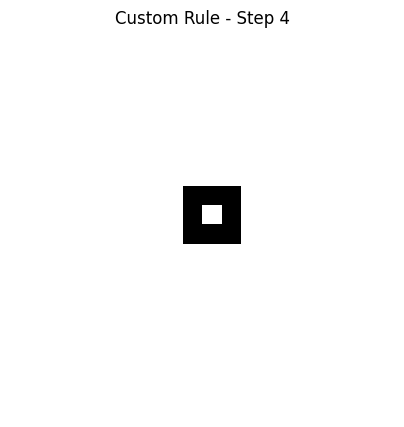

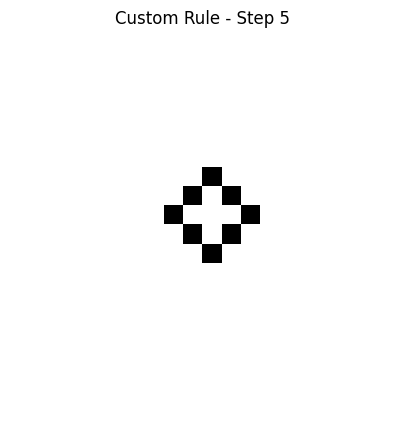

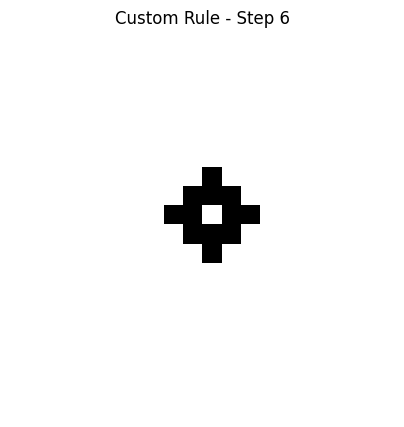

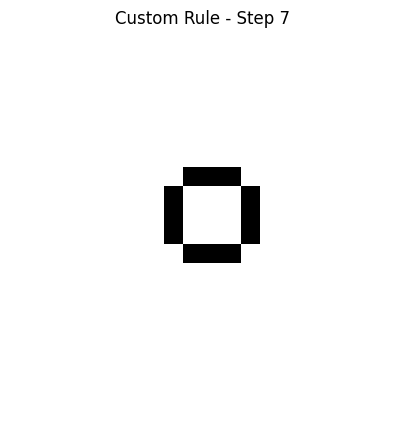

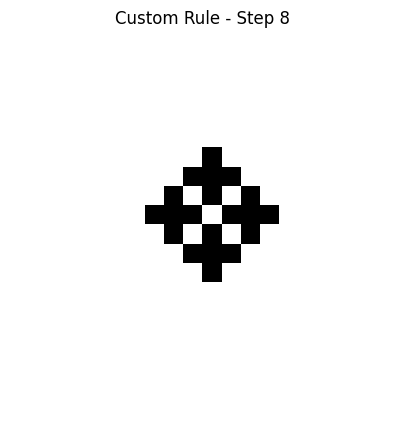

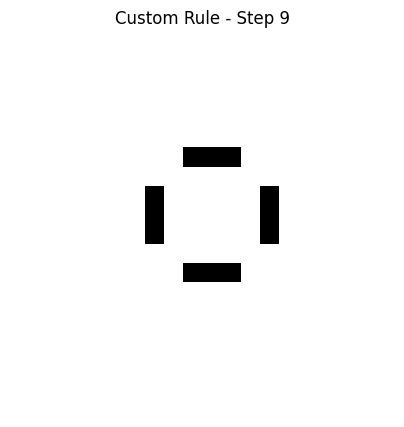

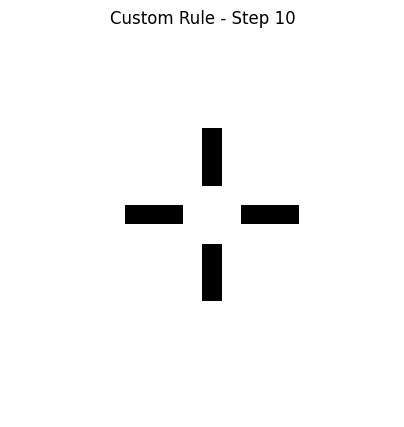

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def custom_rule(grid, x, y):
    """Custom rule for state transition."""
    neighbors = grid[x-1:x+2, y-1:y+2].sum() - grid[x, y]
    if grid[x, y] == 1:  # Alive
        return 1 if neighbors in [2, 3] else 0
    else:  # Dead
        return 1 if neighbors == 3 else 0

def apply_custom_rule(grid, steps):
    """Applies the custom rule over multiple steps."""
    rows, cols = grid.shape
    for _ in range(steps):
        new_grid = grid.copy()
        for x in range(1, rows-1):
            for y in range(1, cols-1):
                new_grid[x, y] = custom_rule(grid, x, y)
        grid = new_grid
        yield grid

# Initial grid
grid = np.zeros((20, 20), dtype=int)
grid[9, 9] = grid[9, 10] = grid[9, 11] = grid[10, 10] = 1  # Glider-like structure

# Simulate and visualize
for step, g in enumerate(apply_custom_rule(grid, steps=10)):
    plt.figure(figsize=(5, 5))
    plt.imshow(g, cmap="binary", interpolation="none")
    plt.title(f"Custom Rule - Step {step+1}")
    plt.axis("off")
    plt.show()
